In [2]:
# Importamos las cosas usuales

%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import display

from scripts.db import *
from scripts.plots import *
from scripts.stats import *
from scripts.statsTransferencia import *

In [29]:
# Cargamos los datos:

import pandas as pd

resumen = dataNumerica()
data = pd.DataFrame.from_dict(resumen, orient='index')

#Trasnformamos los valores que interesan en columnas (Por ahora voy a hacer todo en angulos)
entrenamientoP = pd.DataFrame()
entrenamientoA = pd.DataFrame()
entrenamiento = pd.DataFrame()

entrenamientoP['TI'] = data[data['Orientacion'] == 'P30']['TestInicialAngulos'].map(lambda x: x[0])
entrenamientoP['TF'] = data[data['Orientacion'] == 'P30']['TestFinalAngulos'].map(lambda x: x[0])
entrenamientoA['TI'] = data[data['Orientacion'] == 'A30']['TestInicialAngulos'].map(lambda x: x[4])
entrenamientoA['TF'] = data[data['Orientacion'] == 'A30']['TestFinalAngulos'].map(lambda x: x[4])
# entrenamiento['TI'] = data[data['Orientacion'] != 'CONTROL']['TestInicialAngulos'].map(lambda x: x[0])
# entrenamiento['TI'] = data[data['Orientacion'] == 'A30']['TestInicialAngulos'].map(lambda x: x[4])
# entrenamiento['TF'] = data[data['Orientacion'] != 'CONTROL']['TestFinalAngulos'].map(lambda x: x[0])
# entrenamiento['TF'] = data[data['Orientacion'] == 'A30']['TestFinalAngulos'].map(lambda x: x[4])


orientaciones = {0:'EntrenamientoInicialEnAngulos',1:'EntrenamientoMedioEnAngulos',2:'EntrenamientoFinalEnAngulos'}

for key, value in orientaciones.items():
    for i in range(4):
        entrenamientoP['E'+str(key)+'D'+str(i)] = data[data['Orientacion'] == 'P30'][orientaciones[key]].map(lambda x: x[i])
        entrenamientoA['E'+str(key)+'D'+str(i)] = data[data['Orientacion'] == 'A30'][orientaciones[key]].map(lambda x: x[i])
        entrenamiento['E'+str(key)+'D'+str(i)] = data[data['Orientacion'] != 'CONTROL'][orientaciones[key]].map(lambda x: x[i])


    

/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:536: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_FaseActiva].replace('ExperimentoCompleto', 'TestFinal', inplace=True)
/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:508: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_OrientacionEntrenamiento].replace('A30', 'P30', inplace=True)
/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:510: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_OrientacionEntrenamiento].replace('P30', 'CONTROL', inplace=True)


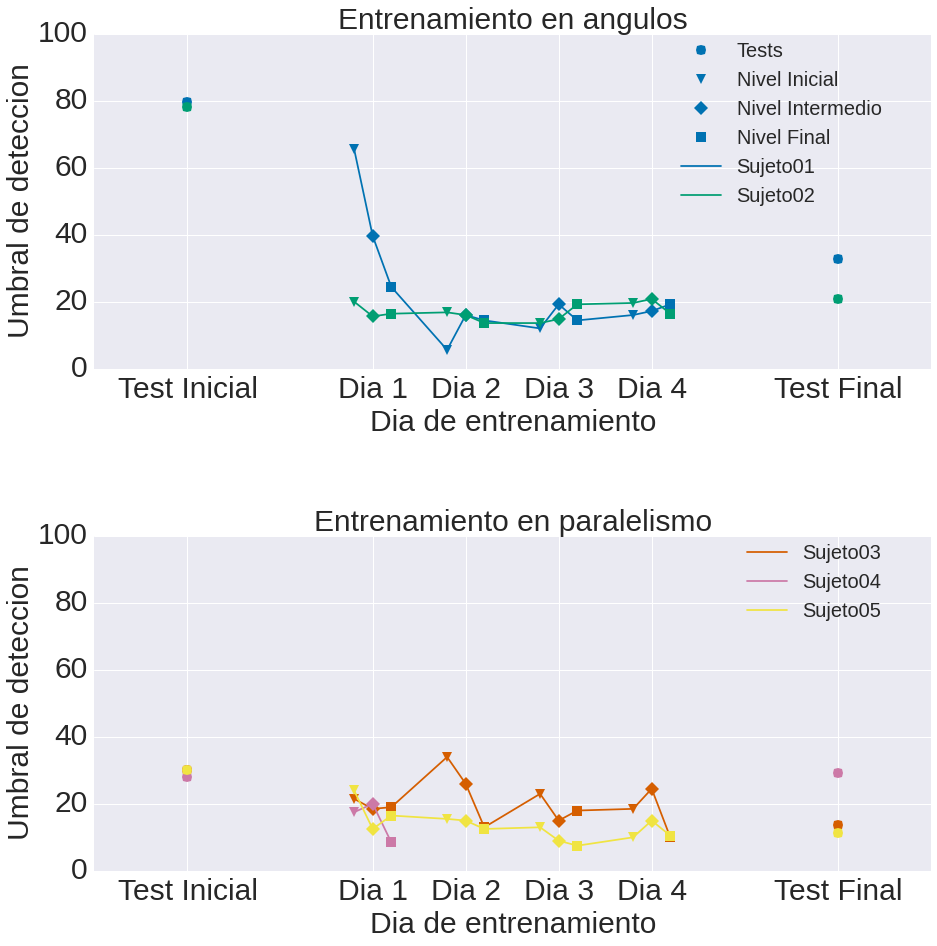

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2,1)

fig.set_size_inches(15,15)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.5)


dias = [0,2,3,4,5,7]
#sns.set_palette("colorblind")
colors=sns.color_palette()

ax[0].set_title ('Entrenamiento en angulos', fontsize=30)
ax[1].set_title ('Entrenamiento en paralelismo', fontsize=30)

for i in [0,1]:
    ax[i].set_ylim([0,100])
    ax[i].set_ylabel('Umbral de deteccion', fontsize=30)
    ax[i].tick_params(labelsize=30)
    ax[i].set_xlim([-1,8])
    ax[i].set_xlabel('Dia de entrenamiento', fontsize=30)
    ax[i].set_xticks (dias)
    ax[i].set_xticklabels (['Test Inicial', 'Dia 1', 'Dia 2', 'Dia 3', 'Dia 4', 'Test Final'])
    
i=0
corrimiento = 0.2
for index, row in entrenamientoA.iterrows():
    ax[0].plot(dias[5], row['TF'], 'o', color=colors[i], markersize=10)
    if not i:
        ax[0].plot(dias[0], row['TI'], 'o', color=colors[i], markersize=10, label='Tests')
        ax[0].plot([dia-corrimiento for dia in dias[1:5]], [row['E0D'+str(i)] for i in range(4)],'v', color=colors[i], markersize=10, label='Nivel Inicial')
        ax[0].plot([dia+0 for dia in dias[1:5]], [row['E1D'+str(i)] for i in range(4)],'D', color=colors[i], markersize=10, label='Nivel Intermedio')
        ax[0].plot([dia+corrimiento for dia in dias[1:5]], [row['E2D'+str(i)] for i in range(4)],'s', color=colors[i], markersize=10, label='Nivel Final')
    else:
        ax[0].plot(dias[0], row['TI'], 'o', color=colors[i], markersize=10)
        ax[0].plot([dia-corrimiento for dia in dias[1:5]], [row['E0D'+str(i)] for i in range(4)],'v', color=colors[i], markersize=10)
        ax[0].plot([dia+0 for dia in dias[1:5]], [row['E1D'+str(i)] for i in range(4)],'D', color=colors[i], markersize=10)
        ax[0].plot([dia+corrimiento for dia in dias[1:5]], [row['E2D'+str(i)] for i in range(4)],'s', color=colors[i], markersize=10)
    fechas = [[dia-corrimiento, dia, dia+corrimiento] for dia in dias[1:5]]
    fechas = [item for sublist in fechas for item in sublist]
    valores = [[row['E0D'+str(i)],row['E1D'+str(i)],row['E2D'+str(i)]] for i in range(4)]
    valores = [item for sublist in valores for item in sublist]
    ax[0].plot (fechas, valores, color= colors[i], label = index)
    i = i + 1

for index, row in entrenamientoP.iterrows():
    ax[1].plot(dias[0], row['TI'], 'o', color=colors[i], markersize=10)
    ax[1].plot(dias[5], row['TF'], 'o', color=colors[i], markersize=10)
    ndatos = sum([row['E0D'+str(i)] != 0 for i in range(4)])
    ax[1].plot([dia-corrimiento for dia in dias[1:1+ndatos]], [row['E0D'+str(i)] for i in range(ndatos)],'v', color=colors[i], markersize=10)
    ax[1].plot([dia for dia in dias[1:1+ndatos]], [row['E1D'+str(i)] for i in range(ndatos)],'D', color=colors[i], markersize=10)
    ax[1].plot([dia+corrimiento for dia in dias[1:1+ndatos]], [row['E2D'+str(i)] for i in range(ndatos)],'s', color=colors[i], markersize=10)
    
    fechas = [[dia-corrimiento, dia, dia+corrimiento] for dia in dias[1:1+ndatos]]
    fechas = [item for sublist in fechas for item in sublist]
    valores = [[row['E0D'+str(i)],row['E1D'+str(i)],row['E2D'+str(i)]] for i in range(ndatos)]
    valores = [item for sublist in valores for item in sublist]
    ax[1].plot (fechas, valores, color= colors[i], label = index)
    i = i + 1

ax[0].legend(bbox_to_anchor=(0.95, 1), loc=1, borderaxespad=0., fontsize=20)
ax[1].legend(bbox_to_anchor=(0.95, 1), loc=1, borderaxespad=0., fontsize=20)
fig.savefig('./Images/TransferenciaEntrenamientoNuevo', bbox_inches='tight')

In [181]:
entrenamientoP

,TI,TF,E0D0,E0D1,E0D2,E0D3,E1D0,E1D1,E1D2,E1D3,E2D0,E2D1,E2D2,E2D3
Sujeto03,30,13.6,21.5,34.0,23,18.5,18.5,26,15,24.5,19.0,13.0,18.0,10.0
Sujeto04,28,29.2,17.5,0.0,0,0.0,20.0,0,0,0.0,8.5,0.0,0.0,0.0
Sujeto05,30,11.2,24.0,15.5,13,10.0,12.5,15,9,15.0,16.5,12.5,7.5,10.5
